<a href="https://colab.research.google.com/github/data-better/ASL/blob/master/MNIST_FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  MNIST 숫자 손글씨 분류

### Keras 패키지 불러오기

In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import initializers
from keras.utils import np_utils

Using TensorFlow backend.


### MNIST 데이터를 읽고 그래프로 살펴보기

11493376/11490434 [==============================] - 0s 0us/step


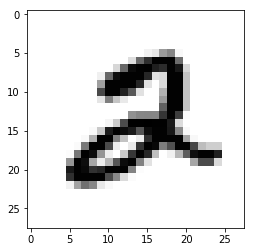

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[5]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [3]:
print(type(digit))

print("digit :", digit.shape)
print("train images :", train_images.shape)
print("test  images :", test_images.shape)


<class 'numpy.ndarray'>
digit : (28, 28)
train images : (60000, 28, 28)
test  images : (10000, 28, 28)


###  MNIST Data  표준화 및 One-hot coding

In [0]:
# 표준화
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32')/255.0

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32')/255.0

# One-hot coding
train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

### 은닉층이 1개인 완전연결 신경망 모형 작성

In [5]:
network = models.Sequential()
network.add(layers.Dense(512, activation='sigmoid', input_dim=28*28))
network.add(layers.Dense(10, activation='softmax'))

W0721 07:53:12.917158 140206686545792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 07:53:12.955613 140206686545792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 07:53:12.962296 140206686545792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0721 07:53:22.049732 140206686545792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 07:53:22.089781 140206686545792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [7]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

W0721 07:53:40.448481 140206686545792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0721 07:53:40.499907 140206686545792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.4724 - acc: 0.8728
Epoch 2/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2538 - acc: 0.9276
Epoch 3/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.1995 - acc: 0.9423
Epoch 4/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.1589 - acc: 0.9540
Epoch 5/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.1296 - acc: 0.9622
Epoch 6/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.1083 - acc: 0.9693
Epoch 7/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0901 - acc: 0.9744
Epoch 8/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0761 - acc: 0.9786
Epoch 9/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0650 - acc: 0.9813
Epoch 10/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0544 - acc: 0.9849

In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 47us/step


In [9]:
print('test_acc:', test_acc)

test_acc: 0.976


In [10]:
def model_net(nh, act, opt):
  network =  models.Sequential()
  network.add(layers.Dense(nh, activation=act, input_dim=28*28))
  network.add(layers.Dense(10, activation='softmax'))
  
  network.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  network.fit(train_images, train_labels, epochs=10, batch_size=128)
  test_loss1, test_acc1 = network.evaluate(test_images, test_labels)
  print('test_acc:', test_acc1)
  return network

net1 = model_net(512, 'relu', 'adam')


Epoch 1/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2692 - acc: 0.9239
Epoch 2/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1102 - acc: 0.9687
Epoch 3/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0740 - acc: 0.9784
Epoch 4/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0517 - acc: 0.9850
Epoch 5/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0377 - acc: 0.9892
Epoch 6/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0294 - acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0223 - acc: 0.9939
Epoch 8/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0159 - acc: 0.9958
Epoch 9/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.0128 - acc: 0.9967
Epoch 10/10
10000/10000 [==============================] - 0s 48us/step
test_acc: 0.9811


In [11]:
net1 = model_net(256, 'relu', 'adam')

Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3088 - acc: 0.9136
Epoch 2/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.1348 - acc: 0.9625
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0935 - acc: 0.9730
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.0692 - acc: 0.9801
Epoch 5/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.0527 - acc: 0.9850
Epoch 6/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0424 - acc: 0.9878
Epoch 7/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0342 - acc: 0.9904
Epoch 8/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0264 - acc: 0.9929
Epoch 9/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0214 - acc: 0.9944
Epoch 10/10
10000/10000 [==============================] - 0s 38us/step
test_acc: 0.9772
